In [223]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [3]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")

## 1. Plot Sr vs descriptors

In [3]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()
df = df.drop(columns=['stext','start_year','end_year','years','kg'])
df_st = StandardScaler().fit_transform(df) #standardize all values
df_st = pd.DataFrame(df_st)
df_st.index = df.index
df_st.columns = df.columns

In [180]:
# plot sr vs descriptors
def plot_sr_vs_var(df,var1,var2,mode):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.plot(df[var1],df[var2],'go',markersize=1)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_tc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis_r', 21)
    bounds = np.linspace(0,0.5,5)
    bounds2 = np.linspace(0,0.5,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['tc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['tc']<bounds[1]],df[var2][df['tc']<bounds[1]],c=df['tc'][df['tc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],df[var2][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],c=df['tc'][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],df[var2][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],c=df['tc'][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['tc']>=bounds[3])],df[var2][(df['tc']>=bounds[3])],c=df['tc'][(df['tc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ntc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0.3,0.8,5)
    bounds2 = np.linspace(0.3,0.8,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ntc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='non tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ntc']<bounds[1]],df[var2][df['ntc']<bounds[1]],c=df['ntc'][df['ntc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],df[var2][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],c=df['ntc'][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],df[var2][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],c=df['ntc'][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ntc']>=bounds[3])],df[var2][(df['ntc']>=bounds[3])],c=df['ntc'][(df['ntc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ai(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0,2,5)
    bounds2 = np.linspace(0,2,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ai'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='aridity index', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ai']<bounds[1]],df[var2][df['ai']<bounds[1]],c=df['ai'][df['ai']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],df[var2][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],c=df['ai'][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],df[var2][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],c=df['ai'][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ai']>=bounds[3])],df[var2][(df['ai']>=bounds[3])],c=df['ai'][(df['ai']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()

In [5]:
var = df.columns
for i in var:
    plot_sr_vs_var(df,i,'sr_20','keep_units')
    plot_sr_vs_var(df_st,i,'sr_20','standardized')
    plot_sr_vs_var_tc(df,i,'sr_20','tree_cover')
    plot_sr_vs_var_ntc(df,i,'sr_20','non_tree_cover')
    plot_sr_vs_var_ai(df,i,'sr_20','aridity_index')

## 2. PCA + clusters

In [51]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()
df = df.drop(columns=['stext','start_year','end_year','years','kg','lat','lon'])
df = df.drop(columns=['idu_mean_l', 'idu_max_l', 'hpd_mean_l',
       'hpd_max_l', 'hpf_l', 'lpf_l', 'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l',
       'sp_l', 'st_l', 'se_l', 'sd_l', 'sti_l', 'asi_l'])
df = df.drop(columns=['q_mean'])
df

,p_mean,ep_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,hpd_mean,...,slp_std,iwu,ia,bp,dtb,pclay,psand,pcarb,bulk,sr_20
br_0003200,5.303953,2.608627,19.857762,0.491827,0.604298,14.268765,12.021896,4.21,16.93,1.22,...,3.590448,0.100052,0.095052,0.000000,13.89,36.399144,37.698498,2.198518,132.033822,123.596026
ca_0002351,1.590253,1.401269,0.643260,0.881161,0.419085,32.852726,25.221876,5.05,22.43,1.35,...,7.937310,0.000692,0.003286,0.069907,19.41,17.094944,45.838508,4.124604,134.041930,85.414394
fr_0001142,2.989535,1.520868,10.193313,0.508730,0.563267,23.400001,19.250000,3.87,20.35,1.15,...,1.086816,0.000000,0.000147,0.000000,15.27,28.276790,28.212561,2.762086,141.694949,197.286771
br_0001524,4.594565,2.985874,19.671313,0.649871,0.691181,10.875286,7.688446,3.35,18.23,1.23,...,2.908957,0.004303,0.004408,0.000000,18.95,43.042378,38.771631,3.079075,115.424594,160.222472
in_0000027,3.368431,2.750685,25.678652,0.816607,1.198574,17.669193,15.270651,17.75,72.93,1.77,...,1.251385,0.094199,0.016516,0.003903,22.31,39.763032,35.817680,1.576522,156.472020,396.277444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb_0000090,2.150804,1.572770,10.290431,0.731247,0.776424,18.325000,14.624166,3.88,22.30,1.12,...,1.305189,0.001370,0.000274,0.000000,8.63,19.798915,38.049589,3.841592,135.921367,117.701360
229661A,3.269137,2.950922,11.876446,0.902661,0.586347,15.333334,12.496111,3.64,17.63,1.15,...,2.799325,0.000000,0.000000,0.000000,3.88,25.550696,53.458085,7.154145,114.292085,189.439878
br_0000871,4.374842,2.735070,22.204727,0.625182,0.819372,7.895573,6.125985,5.96,53.53,1.37,...,1.406948,0.004821,0.002569,0.000000,24.83,45.266696,38.176125,2.532475,113.757366,203.656842
gb_0000104,2.294868,1.268865,10.186598,0.552914,0.720360,17.800003,14.266667,3.77,22.73,1.13,...,0.662397,0.000351,0.004777,0.000000,9.95,26.563523,30.053947,3.540056,139.665966,55.107518


In [52]:
df.columns

Index(['p_mean', 'ep_mean', 't_mean', 'ai', 'hai', 'tdiff_max', 'tdiff_mean',
       'idu_mean', 'idu_max', 'hpd_mean', 'hpd_max', 'hpf', 'lpf', 'si_p',
       'si_ep', 'phi', 'de', 'dp', 'dt', 'sp', 'st', 'se', 'sd', 'sti', 'ftf',
       'asi', 'cvp', 'tc', 'ntc', 'nonveg', 'area', 'el_mean', 'el_min',
       'el_max', 'el_std', 'slp_mean', 'slp_max', 'slp_min', 'slp_std', 'iwu',
       'ia', 'bp', 'dtb', 'pclay', 'psand', 'pcarb', 'bulk', 'sr_20'],
      dtype='object')

In [53]:
features = df.columns
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 48


In [54]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([21.1, 12.8, 11.6,  5.5,  4.4,  4.2,  3.6,  3. ,  2.7,  2.6,  2.5,
        2.3,  2.2,  2.1,  2. ,  1.6,  1.5,  1.5,  1.3,  1.3,  1.2,  1.1,
        0.9,  0.9,  0.8,  0.7,  0.6,  0.6,  0.5,  0.4,  0.4,  0.4,  0.3,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,
        0. ,  0. ,  0. ,  0. ])

In [55]:
# split features for visualization of PCA
p = int(lf/7)
features1=features[0:p]
features2=features[p:2*p]
features3=features[2*p:3*p]
features4=features[3*p:4*p]
features5=features[4*p:5*p]
features6=features[5*p:6*p]
features7=features[6*p:]

In [56]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
# ld_df

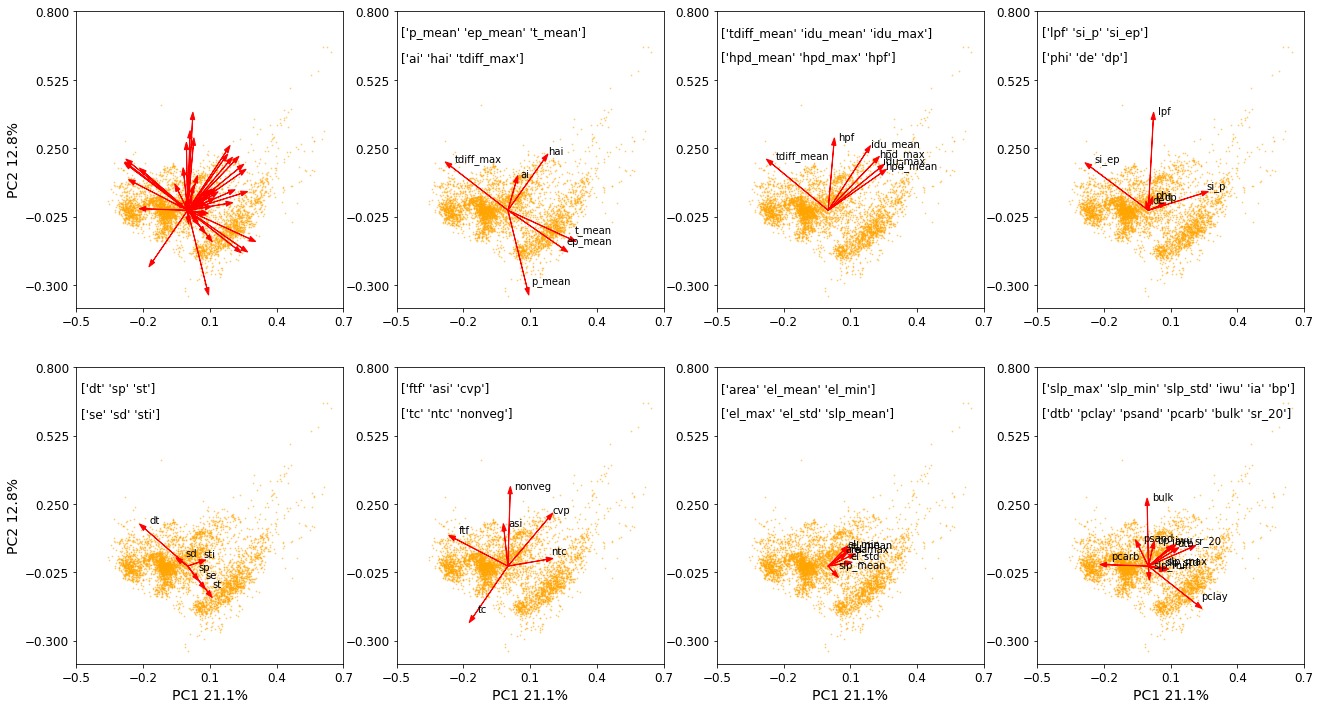

In [57]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(22,12))
ax = fig.add_subplot(241)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    # ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)

ax = fig.add_subplot(242)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features1):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features1[i]]['xs'], # length of the arrow along x
        ld_df.loc[features1[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features1[i]]['xs']+0.02, ld_df.loc[features1[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features1[0:int(len(features1)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features1[int(len(features1)/2):].values}',size=12)

ax = fig.add_subplot(243)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features2):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features2[i]]['xs'], # length of the arrow along x
        ld_df.loc[features2[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features2[i]]['xs']+0.02, ld_df.loc[features2[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features2[0:int(len(features2)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features2[int(len(features2)/2):].values}',size=12)

ax = fig.add_subplot(244)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features3):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features3[i]]['xs'], # length of the arrow along x
        ld_df.loc[features3[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features3[i]]['xs']+0.02, ld_df.loc[features3[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features3[0:int(len(features3)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features3[int(len(features3)/2):].values}',size=12)

ax = fig.add_subplot(245)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features4):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features4[i]]['xs'], # length of the arrow along x
        ld_df.loc[features4[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features4[i]]['xs']+0.02, ld_df.loc[features4[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)
ax.text(-0.48,0.7,f'{features4[0:int(len(features4)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features4[int(len(features4)/2):].values}',size=12)

ax = fig.add_subplot(246)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features5):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features5[i]]['xs'], # length of the arrow along x
        ld_df.loc[features5[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features5[i]]['xs']+0.02, ld_df.loc[features5[i]]['ys']+0.02, varnames,size=10) 
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features5[0:int(len(features5)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features5[int(len(features5)/2):].values}',size=12)

ax = fig.add_subplot(247)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features6):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features6[i]]['xs'], # length of the arrow along x
        ld_df.loc[features6[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features6[i]]['xs']+0.02, ld_df.loc[features6[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features6[0:int(len(features6)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features6[int(len(features6)/2):].values}',size=12)

ax = fig.add_subplot(248)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features7):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features7[i]]['xs'], # length of the arrow along x
        ld_df.loc[features7[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features7[i]]['xs']+0.02, ld_df.loc[features7[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features7[0:int(len(features7)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features7[int(len(features7)/2):].values}',size=12)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/pca_scatters.jpg',bbox_inches='tight',dpi=300)


In [58]:
ld_sort = ld_df.sort_values('len',ascending=False)
ld_sort = ld_sort[0:20]
ld_sort['rank'] = np.arange(1,len(ld_sort)+1,1)
ld_sort = ld_sort.drop(columns=['xs','ys'])
ld_sort

,len,rank
lpf,0.365941,1
p_mean,0.324323,2
tdiff_mean,0.316317,3
si_ep,0.313831,4
tdiff_max,0.313196,5
t_mean,0.301135,6
idu_mean,0.293594,7
nonveg,0.291227,8
ep_mean,0.288070,9
hpd_max,0.287291,10


In [66]:
# features = ld_sort.index.values
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p','tc']
features = np.append(features,'sr_20')
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 8


In [67]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([39.9, 33.3,  8.2,  7.1,  4.9,  3.8,  1.9,  0.7])

In [68]:
# split features for visualization of PCA
p = int(lf/7)
features1=features[0:p]
features2=features[p:2*p]
features3=features[2*p:3*p]
features4=features[3*p:4*p]
features5=features[4*p:5*p]
features6=features[5*p:6*p]
features7=features[6*p:]

In [69]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
ld_df

,xs,ys,len
lpf,-0.035646,0.553882,0.555028
si_ep,-0.494723,0.201692,0.534257
ep_mean,0.487868,-0.190058,0.523581
idu_mean,0.283914,0.383635,0.477266
p_mean,0.244688,-0.490985,0.548579
si_p,0.459529,0.164758,0.488172
tc,-0.187013,-0.399798,0.441376
sr_20,0.359643,0.202946,0.412953


k=5 is ok


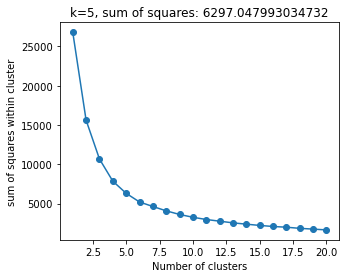

In [88]:
#Identify the number of clusters
s=[]
for i in range(1,21):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(pca_df)
    s.append(kmeans.inertia_)
# plot cluster scores
plt.figure(figsize=(5,4))
plt.plot(range(1,21),s,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squares within cluster')
plt.title(f'k=5, sum of squares: {s[4]}')
print('k=5 is ok')
plt.savefig(f'{work_dir}/output/figures/prediction_figures/pca/k_clusters.jpg',bbox_inches='tight',dpi=300)


In [85]:
# run with k=5
kmeans = KMeans(5, random_state=42)
kmeans.fit(pca_df)
identified_clusters = kmeans.fit_predict(pca_df)
labels = kmeans.labels_

data_with_clusters = pca_df.copy()
data_with_clusters['Clusters'] = identified_clusters

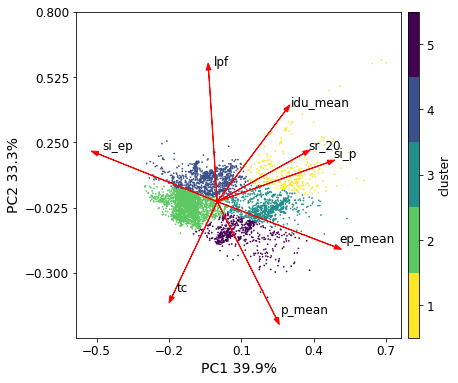

In [120]:
xs = loadings[0]
ys = loadings[1]

cmap_vd2 = cm.get_cmap('viridis_r', 5)
bounds = np.linspace(0,5,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
s=ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,c=data_with_clusters.Clusters,s=0.5,cmap=cmap_vd2,norm=norm)
cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(['1','2','3','4','5'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='cluster', size=12)
for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=12)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/pca_scatters_selected.jpg',bbox_inches='tight',dpi=300)


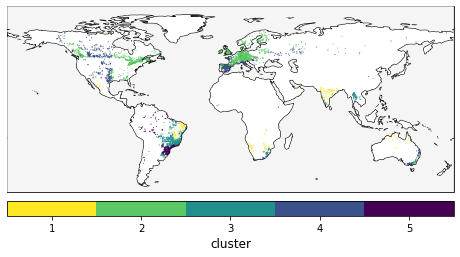

In [123]:
# map Sr
data_sources = 'gswp-p_gleam-ep_gswp-t'
co = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
co = co.dropna()
co['cluster'] = data_with_clusters['Clusters'].values

cmap_vd2 = cm.get_cmap('viridis_r', 5)
bounds = np.linspace(0,5,6)
bounds2 = np.linspace(0,5,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(co.lon,co.lat,s=0.8,c=co['cluster'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(['1','2','3','4','5'])
cbar.set_label(label='cluster', size=12)
ax.set_title('',size=14)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/cluster_map.jpg', bbox_inches='tight',dpi=300)


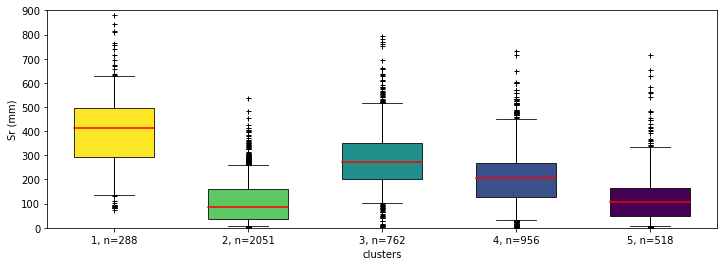

In [189]:
boxprops1 = dict(facecolor=cmap_vd2(0),color="black",linewidth=0.8)
boxprops2 = dict(facecolor=cmap_vd2(1),color="black",linewidth=0.8)
boxprops3 = dict(facecolor=cmap_vd2(2),color="black",linewidth=0.8)
boxprops4 = dict(facecolor=cmap_vd2(3),color="black",linewidth=0.8)
boxprops5 = dict(facecolor=cmap_vd2(4),color="black",linewidth=0.8)
medianprops = dict(color="red",linewidth=1.5)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

co1 = co[co.cluster==0]
co2 = co[co.cluster==1]
co3 = co[co.cluster==2]
co4 = co[co.cluster==3]
co5 = co[co.cluster==4]

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.boxplot(co1.sr_20,positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co2.sr_20,positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co3.sr_20,positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops3,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co4.sr_20,positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops4,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co5.sr_20,positions=[5],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops5,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.xaxis.set_ticks([1,2,3,4,5])
ax.xaxis.set_ticklabels([f'1, n={len(co1)}',f'2, n={len(co2)}',f'3, n={len(co3)}',f'4, n={len(co4)}',f'5, n={len(co5)}'])
ax.set_ylabel('Sr (mm)')
ax.set_xlabel('clusters')
ax.set_ylim(0,900)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/cluster_sr_boxplot.jpg', bbox_inches='tight',dpi=300)


In [185]:
def plot_sr_vs_var_clusters(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis_r', 5)
    bounds = np.linspace(0,5,6)
    bounds2 = np.linspace(0,5,6)
    norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

    fig = plt.figure(figsize=(20, 6))
    ax1 = plt.subplot(2,6,3)
    ax2 = plt.subplot(2,6,4)
    ax3 = plt.subplot(2,6,5)
    ax4 = plt.subplot(2,6,9)
    ax6 = plt.subplot(2,6,10)
    ax5 = plt.subplot(1,3,1)
    
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['cluster'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='cluster', size=12)
    cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
    cbar.set_ticklabels(['1','2','3','4','5'])
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax6.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    ax6.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['cluster']==0],df[var2][df['cluster']==0],s=0.5,color=cmap(0),norm=norm)
    ax2.scatter(df[var1][df['cluster']==1],df[var2][df['cluster']==1],s=0.5,color=cmap(1),norm=norm)
    ax3.scatter(df[var1][df['cluster']==2],df[var2][df['cluster']==2],s=0.5,color=cmap(2),norm=norm)
    ax4.scatter(df[var1][df['cluster']==3],df[var2][df['cluster']==3],s=0.5,color=cmap(3),norm=norm)
    ax6.scatter(df[var1][df['cluster']==4],df[var2][df['cluster']==4],s=0.5,color=cmap(4),norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    

In [187]:
df=co
var = features
for i in var:
    plot_sr_vs_var_clusters(df,i,'sr_20','clusters5')

## 4. Multi Linear Regression

In [217]:
def regression_input(df, dpar,cluster):
    df = df.dropna()
    df = df[df.cluster==cluster]
    df = df[dpar]

    # exclude sr=zero catchments
    df = df[df['sr_20']>0]

    # standardize values
    df_st = pd.DataFrame(index=df.index, columns=[dpar])
    df_st = (df - df.mean())/df.std()
    
    return df, df_st

In [241]:
def regression(df, df_st, dpar):
    sr_rp = 'sr_20'
    col = dpar[0:-1] # remove sr from dpar
    x,sr = df_st[col],df_st[sr_rp]
    model = sm.OLS(sr,x)
    results = model.fit()
    par = np.round(results.params,3)
    pred_st = model.predict(par)
    r_sq = np.round(results.rsquared,3)
    r_sq_adj = np.round(results.rsquared_adj,3)
    aic = np.round(results.aic,3)
    pval = np.round(results.pvalues,3)
    nobs = results.nobs

    pred = pred_st * np.std(df[sr_rp]) + np.mean(df[sr_rp])
    x = df[sr_rp]
    y = pred
    
    rmse = np.sqrt(np.mean((x-y)**2))
    rele = np.mean(abs(y-x)/x) * 100
    
    return x,y,par,r_sq,r_sq_adj,aic,rmse,rele,nobs

In [242]:
def regression_table(dpar,par,r_sq,r_sq_adj,aic,nobs, tc_th, ntc_th, nonveg_th):
    b = ['tc_th', 'ntc_th','nonveg_th', 'r_sq', 'r_sq_adj', 'aic', 'pval', 'nobs']
    col = np.concatenate([dpar,b])
    df = pd.DataFrame(index=[0],columns=col)
    df[dpar] = par
    df['tc_th']=tc_th
    df['ntc_th']=ntc_th
    df['nonveg_th']=nonveg_th
    df['r_sq'] = r_sq
    df['r_sq_adj'] = r_sq_adj
    df['aic'] = aic
    # df['pval'] = pval
    df['nobs'] = nobs
    return df


In [246]:
def regression_plot(cc_df,dpar,cluster):    
    df = regression_input(cc_df,dpar,cluster )[0]
    df_st = regression_input(cc_df,dpar,cluster)[1]
    df_out = pd.DataFrame()
    dpar = dpar[0:-1]
    
    if (len(df)>100):
        # regression
        rp = 20
        r = regression(df, df_st, dpar)
        sr, sr_pred = r[0], r[1]
        par,r_sq,r_sq_adj,aic,nobs = r[2],r[3],r[4],r[5],r[6]
        
    # Calculate the point density -> this only works if we have more points
    xy = np.vstack([sr,sr_pred])
    z = gaussian_kde(xy)(xy)
    x,y = sr, sr_pred
    
    #plot
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    # ax.plot(x,y,'mo',markersize=2)
    ax.scatter(x, y, c=z, s=1)
    ax.plot([0,1200],[0,1200],'r--')
    ax.set_xlabel('Sr water balance (mm)')
    ax.set_ylabel('Sr predicted (mm)')
    ax.set_xlim(0,900)
    ax.set_ylim(0,900)
    ax.text(0,-150,'Dpar: '+str(dpar),size=11)
    ax.text(0,-190,'Coeff: '+str(np.round(par.values,3)),size=11)
    ax.set_title(f'R^2={np.round(r_sq,3)}, R^2-adj={np.round(r_sq_adj,3)}')
    

In [247]:
def run_regression(cc_df, dpar,cluster):
    # prepare input
    df = regression_input(cc_df, dpar,cluster)[0]
    df_st = regression_input(cc_df, dpar,cluster)[1]
    
    df_out = pd.DataFrame()
    
    if (len(df)>100):
        # regression
        rp = 20
        r = regression(df, df_st, dpar)
        sr, sr_pred = r[0], r[1]
        par,r_sq,r_sq_adj,aic,nobs = r[2],r[3],r[4],r[5],r[6]

        # plot results
        regression_plot(cc_df,dpar,cluster)

        # make table
        # if r_sq_adj>0.2:
        #     df_out = regression_table(dpar,par,r_sq,r_sq_adj,aic,nobs, tc_th, ntc_th, nonveg_th)

    # return df_out

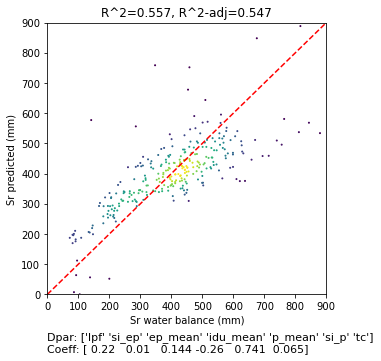

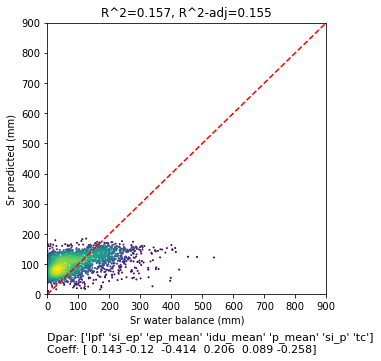

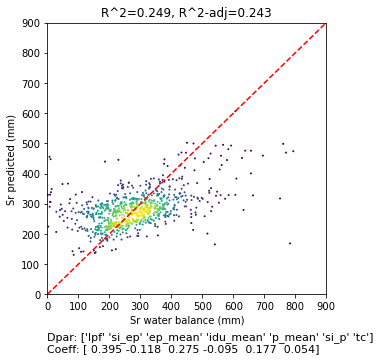

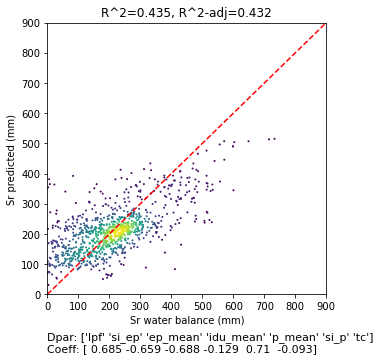

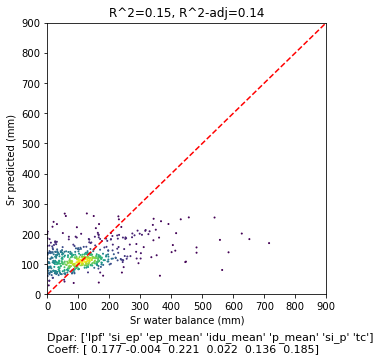

In [249]:
run_regression(co, features,0)
run_regression(co, features,1)
run_regression(co, features,2)
run_regression(co, features,3)
run_regression(co, features,4)

## 4. Hahm scripts random forest

In [6]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()

In [30]:
from sklearn.model_selection import train_test_split

target = df['sr_20']
predictors = ['p_mean','ep_mean','cvp','asi']
pred_df = df[predictors]


X_train, X_valid, y_train, y_valid = train_test_split(pred_df.values, 
                                                      target.values, 
                                                      random_state=42)
MIN_SAMPLES_LEAF = 100

m = RandomForestRegressor(
                          n_jobs=-1, 
                          min_samples_leaf=MIN_SAMPLES_LEAF,
                          oob_score=True)
m_all = RandomForestRegressor(
                          min_samples_leaf=MIN_SAMPLES_LEAF,
                          n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
m_all.fit(pred_df.values,target.values)

RandomForestRegressor(min_samples_leaf=100, n_jobs=-1, oob_score=True)

In [32]:
def rmse(x,y): 
    return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
                       
print_score(m)

# Percent variance explained by model (R2 score)
metrics.r2_score(target.values,m.predict(pred_df.values))

[107.77117047019485, 109.55625063967764, 0.3920204539842622, 0.39807586695622976, 0.35308490771782963]


0.3939926099489296

In [33]:
### HYPERPARAMETER EXPLORATION
rmses = []
min_leaves = [1,2,3,4,5,6,7,8]
for leaves in min_leaves:
    m = RandomForestRegressor(n_estimators=20,
                            n_jobs=-1, 
                            min_samples_leaf=leaves)
    m.fit(X_train, y_train)
    rmses.append(rmse(m.predict(X_valid), y_valid))

Text(0.5, 0, 'Min samples per leaf')

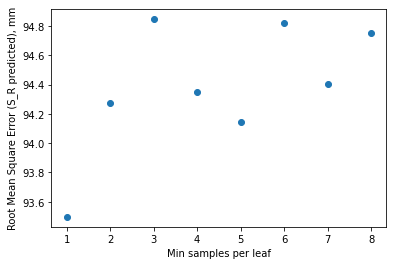

In [34]:
plt.scatter(min_leaves,rmses)
plt.ylabel('Root Mean Square Error (S_R predicted), mm')
plt.xlabel('Min samples per leaf')

Text(0.5, 0, 'Permutation feature importance')

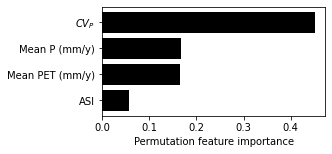

In [36]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(m_all, pred_df.values, target.values,random_state=87)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(4, 2))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], 
         align='center',color='black')
ytick_labels = ['ASI','Mean PET (mm/y)','Mean P (mm/y)','$CV_P$']
plt.yticks(range(len(sorted_idx)), np.array(pred_df.columns)[sorted_idx])
plt.yticks(range(len(sorted_idx)), ytick_labels)

plt.xlabel('Permutation feature importance')

# sns.despine()
# plt.savefig(folder_path+'Figures/'+'feat_imp.pdf',bbox_inches='tight')

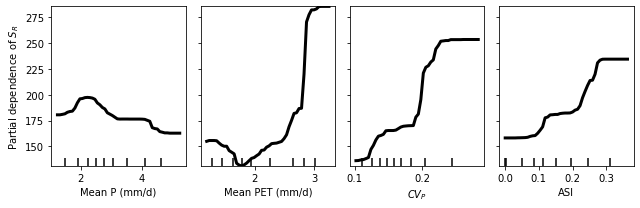

In [38]:
f, ax = plt.subplots(1, 4, figsize=(9,3), sharey=True)

pdp = PartialDependenceDisplay.from_estimator(
    m_all, pred_df.values, [0,1,2,3], 
    feature_names=predictors, 
    n_jobs=3, ax=ax, 
    grid_resolution=50, line_kw={'color':'black','lw':'3'})
# plt.ylim(300,500)
ax[0].set_ylabel('Partial dependence of $S_R$')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
x_labels = ['Mean P (mm/d)', 'Mean PET (mm/d)','$CV_P$','ASI']
for i in range(len(ax)):
    ax[i].set_xlabel(x_labels[i])

# ax[2].set_xlim(0.2,0.5)
# ax[3].set_xlim(0.5,0.75)
f.tight_layout()
# sns.despine()
# plt.savefig(folder_path+'Figures/'+'partial_dependence.pdf',bbox_inches='tight')